# time series prediction

In [2]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

import statsmodels as sm
import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

In [2]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# change text color
import colorama
from colorama import Fore, Style

print(tf.__version__)

: 

In [ ]:
# IPython
from IPython.display import IFrame

大概结构如下：

- Time series decomposition

    - Level
    - Trend
    - Seasonality
    - Noise
- Stationarity
    - AC and PAC plots
    - Rolling mean and std
    - Dickey-Fuller test
- Making our time series stationary
    - Difference transform
    - Log scale
    - Smoothing
    - Moving average

时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

geting daily reports
finish
getiing data
finsh
getting data from shanghai......
finish


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

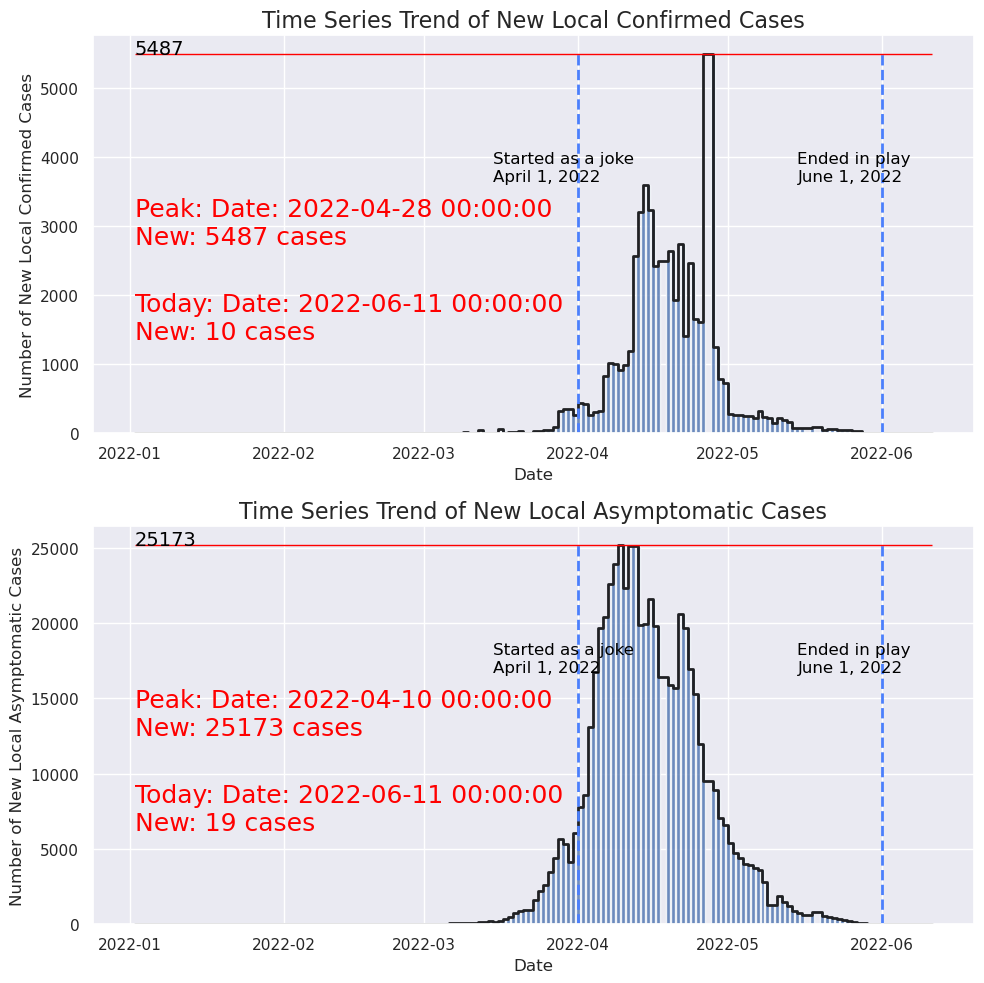

In [4]:
from get_covid_data.getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  

In [5]:
from get_covid_data.data_processing import ts_process_CHINA,ts_process_US,daily_process

In [6]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [7]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [8]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

In [9]:
ts_confirmed_CHINA_incre.head()

,Anhui,Shanghai,Liaoning,Macau,Ningxia,Qinghai,Shaanxi,Shandong,Shanxi,Beijing,...,Heilongjiang,Hebei,Hainan,Guizhou,Guangxi,Guangdong,Gansu,Fujian,Chongqing,Zhejiang
2020-01-22,1,9,2,1,1,0,0,2,1,14,...,0,1,4,1,2,26,0,1,6,10
2020-01-23,8,7,1,1,0,0,3,4,0,8,...,2,0,1,2,3,6,2,4,3,17
2020-01-24,6,4,1,0,1,0,2,9,0,14,...,2,1,3,0,18,21,0,5,18,16
2020-01-25,24,13,13,0,1,1,10,12,5,5,...,5,6,11,1,0,25,2,8,30,19
2020-01-26,21,7,4,3,1,0,7,19,3,27,...,6,5,3,1,13,33,3,17,18,42


In [15]:
ts_confirmed_CHINA_incre.describe().T.sort_values('max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
,,,,,,,,
Hong Kong,1143.0,2516.278215,7365.675288,-23.0,3.0,17.0,1235.0,76991.0
Hubei,1143.0,63.106737,556.801996,-1.0,0.0,0.0,0.0,14840.0
Shanghai,1143.0,58.652668,346.701153,-589.0,2.0,5.0,10.0,5489.0
Jilin,1143.0,35.664042,255.161483,-1.0,0.0,0.0,0.0,4222.0
Zhejiang,1143.0,10.365704,127.716387,0.0,0.0,0.0,2.0,4220.0
Guangdong,1143.0,90.330709,374.922242,0.0,1.0,3.0,13.5,3508.0
Beijing,1143.0,35.672791,173.354282,-1.0,0.0,1.0,5.0,2360.0
Guangxi,1143.0,11.698163,120.968656,0.0,0.0,0.0,1.0,2046.0
Hainan,1143.0,9.171479,73.498599,0.0,0.0,0.0,0.0,1683.0


### Decomposition


- Additive

```
y(t) = level + trend + seasonality + noise
```



- Multiplicative 


```
y(t) = level * trend * seasonality * noise
```


- Automatic time series decomposition

Statsmodel python 库提供了一个函数`seasonal_compose()`来自动分解时间序列，需要指定模型是加法还是乘法。

In [17]:
from get_covid_data import covid_visualization

In [ ]:
covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2022-03-15',
    ma = [3,7],
    method = 'new',              
    specify = 'Shanghai',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = 'confirmed cases'
)

In [19]:
covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2022-03-15',
    ma = [3,7],
    method = 'New',              
    specify = 'Shanghai',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = 'Confirmed'
)

Country：China
Latest Update Time：2023-03-10 04:21:03
----------------------------------------TOTAL-----------------------------------------
As of Now【China】CumulativeConfirmed：3381708 | NewConfirmed：0
As of Now【China】CumulativeDeath：18861 | NewDeath：1
As of Now【Shanghai】CumulativeConfirmed：67040 | NewConfirmed：0
As of Now【Shanghai】CumulativeDeath：595 | NewDeath：0
----------------------------------------DETAIL----------------------------------------
Blueindicates confirmed cases
Redindicates deaths
--------------------------------------------------------------------------------------
Provincial Administrative Region Newconfirmed cases↓ Newdeaths  Confirmed Cases per 100,000 People CumulativeMortality Rate
Anhui                          0                0              3.597             0.308%        
Beijing                        0                0              189.294           0.049%        
Chongqing                      0                0              47.437            0.075%       

In [17]:
ts_confirmed_CHINA_incre['Shanghai']

2020-01-22     9
2020-01-23     7
2020-01-24     4
2020-01-25    13
2020-01-26     7
              ..
2022-06-07    12
2022-06-08     4
2022-06-09     8
2022-06-10    11
2022-06-11    11
Name: Shanghai, Length: 872, dtype: int64

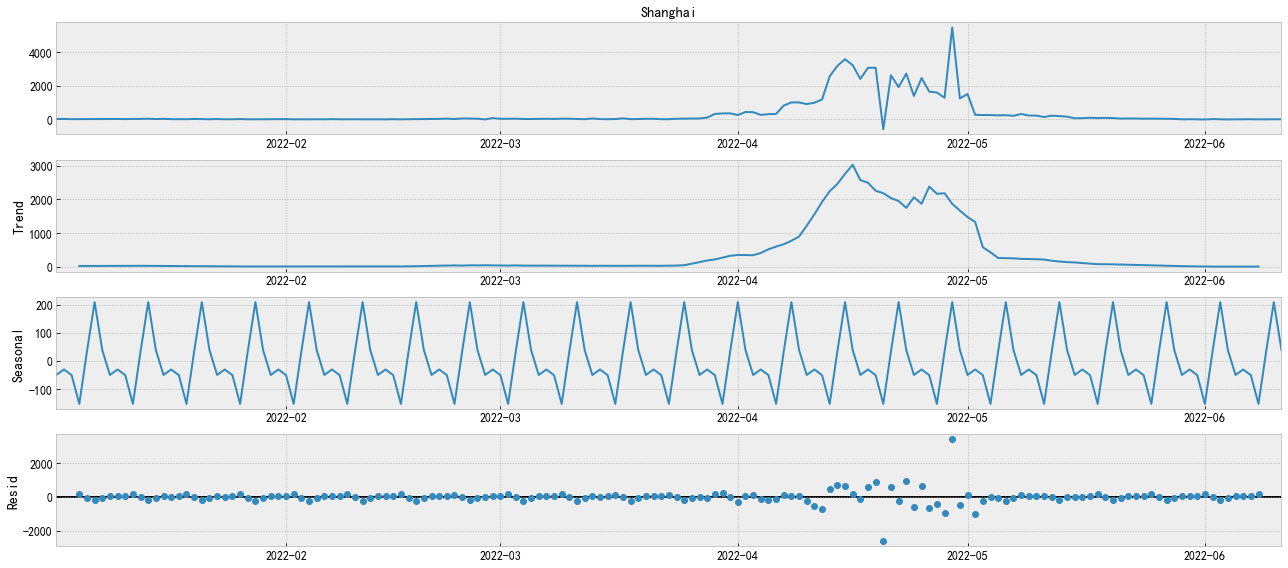

In [22]:
# shanghai since 2022
series_2022 = ts_confirmed_CHINA_incre['Shanghai'][ts_confirmed_CHINA_incre['Shanghai'].index>'2022-01-01']
result = seasonal_decompose(series_2022, model='additive')
result.plot()
plt.show() 

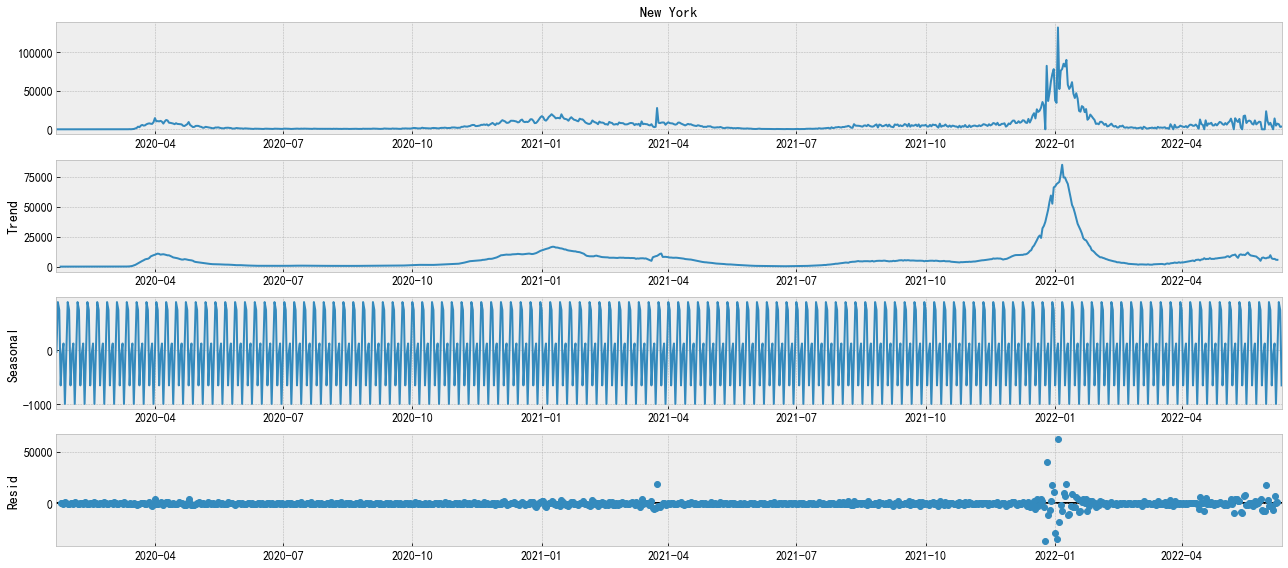

In [23]:
# Newyork
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.plot()
plt.show() 

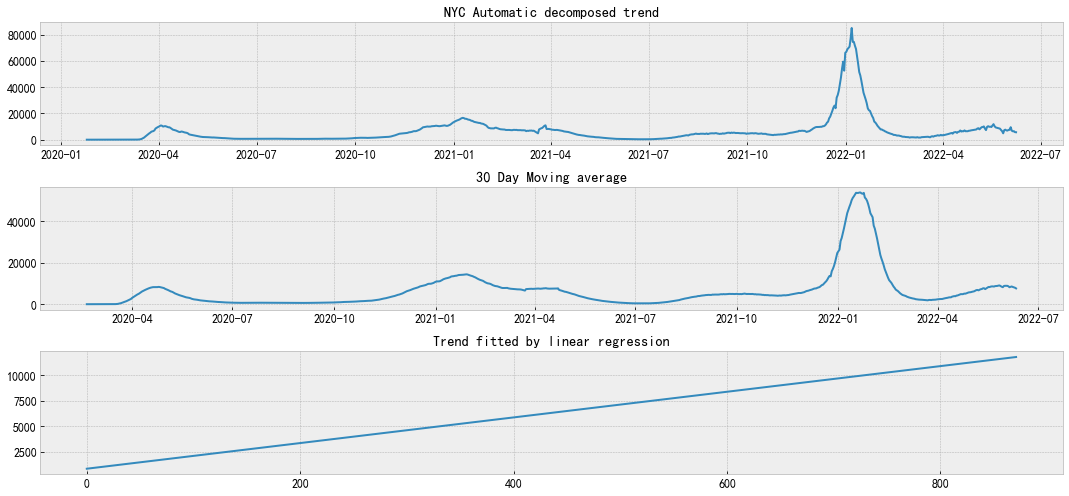

In [24]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(nyc_result.trend)
pm_ax.set_title("NYC Automatic decomposed trend")
 
mm = nyc_series.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("30 Day Moving average")


X = [i for i in range(0, len(nyc_series))]
X = np.reshape(X, (len(X), 1))
y = nyc_series
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

#### Seasonality


Text(0, 0.5, '2022')

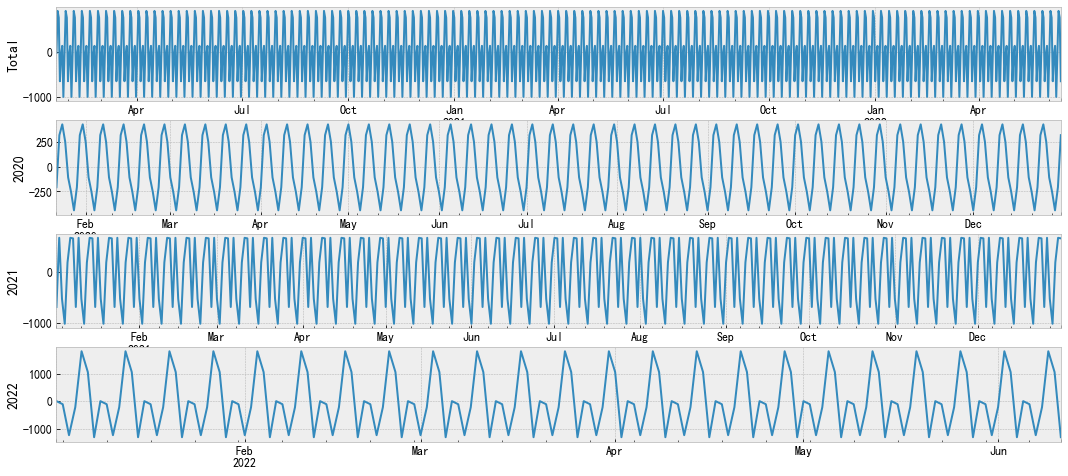

In [25]:
plt.subplot(411)
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.seasonal.plot()
plt.ylabel('Total')
plt.subplot(412)
nyc_series_2020 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index<'2021']
nyc_result_2020 = seasonal_decompose(nyc_series_2020, model='additive')
nyc_result_2020.seasonal.plot()
plt.ylabel('2020')
plt.subplot(413)
nyc_series_2021 = ts_confirmed_US_incre['New York'][(ts_confirmed_US_incre.index>'2021') &(ts_confirmed_US_incre.index<'2022')]
nyc_result_2021 = seasonal_decompose(nyc_series_2021, model='additive')
nyc_result_2021.seasonal.plot()
plt.ylabel('2021')
plt.subplot(414)
nyc_series_2022 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index>'2022']
nyc_result_2022 = seasonal_decompose(nyc_series_2022, model='additive')
nyc_result_2022.seasonal.plot()
plt.ylabel('2022')

4 spikes per month

#### Noise



Text(0.5, 1.0, 'Mean over time')

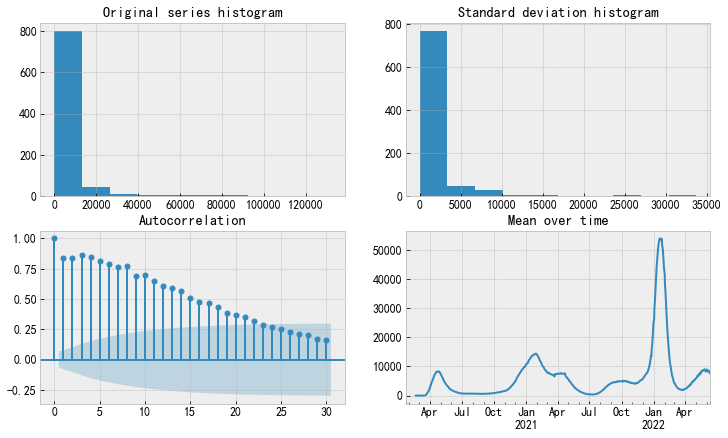

In [26]:
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

nyc_series.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(nyc_series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = nyc_series.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = nyc_series.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

It is clear that our time series data does not follow a Gaussian distribution, and the autocorrelation coefficients are not within the blue shaded area, indicating that it does not contain white noise.

### Stationarity

> A stationary time seris means that its properties do not change with time.



#### ACF and PACF


> If the data would be non-stationary the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends.

> Stationary series autocorrelation values will quickly decrease over time t. This shows us that no information is carried over time and then the series should be constant over time.

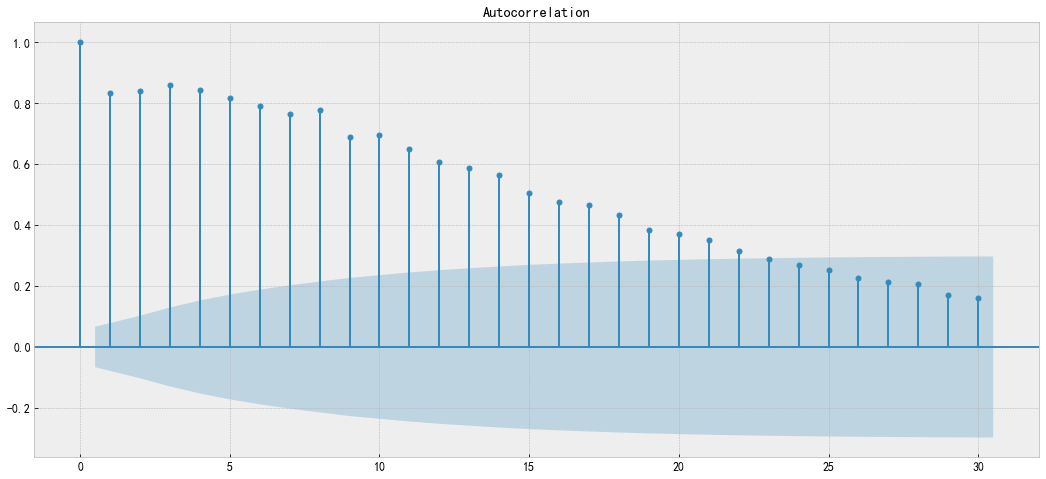

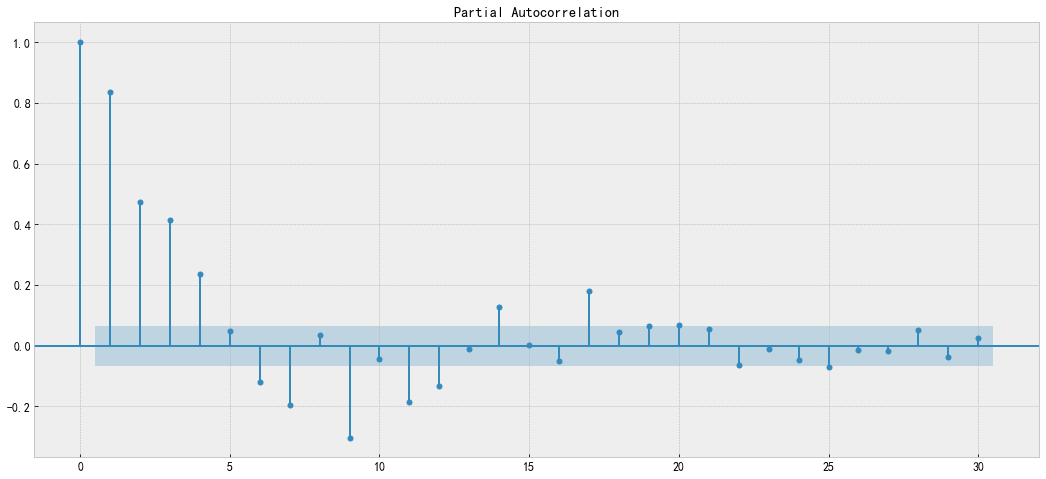

In [27]:
plot_acf(nyc_series, lags=30)
plot_pacf(nyc_series, lags=30)
plt.show()

The statement "ACF does not drop to zero quickly, so it is not stationary"

#### Rolling means and standard deviation


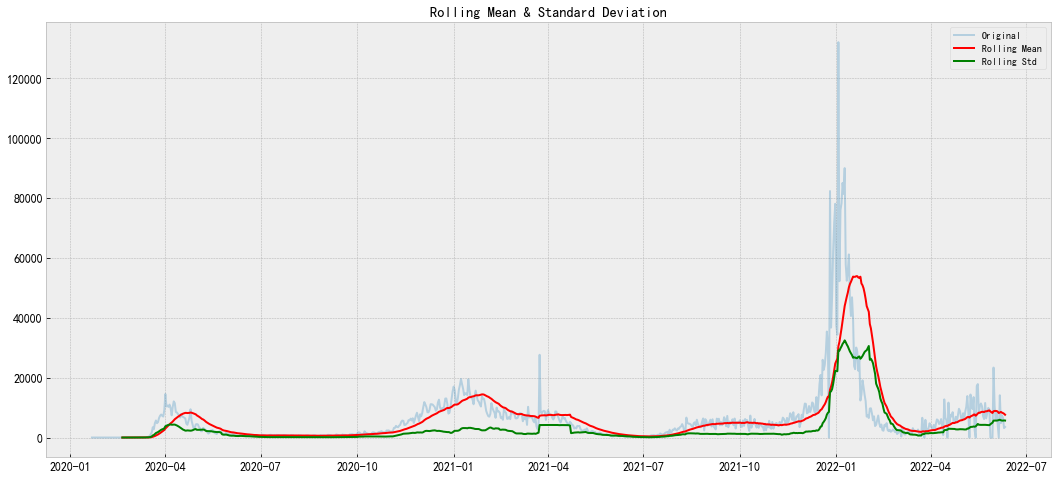

In [28]:
rolmean = nyc_series.rolling(window=30).mean()
rolstd = nyc_series.rolling(window=30).std()

# Plot rolling statistics:
orig = plt.plot(nyc_series, label='Original',alpha = .3)
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

it is not stationary

#### Augmented Dickey-Fuller test



In [29]:
X = nyc_series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.538752
p-value: 0.007046
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


We can see that the p-value: 0.007040 is less than 0.05, so we reject the null hypothesis H0, meaning that the series is stationary.


ADF检验结果：We reject H0 and the series is stationary
ADF检验所得P值：0.007046


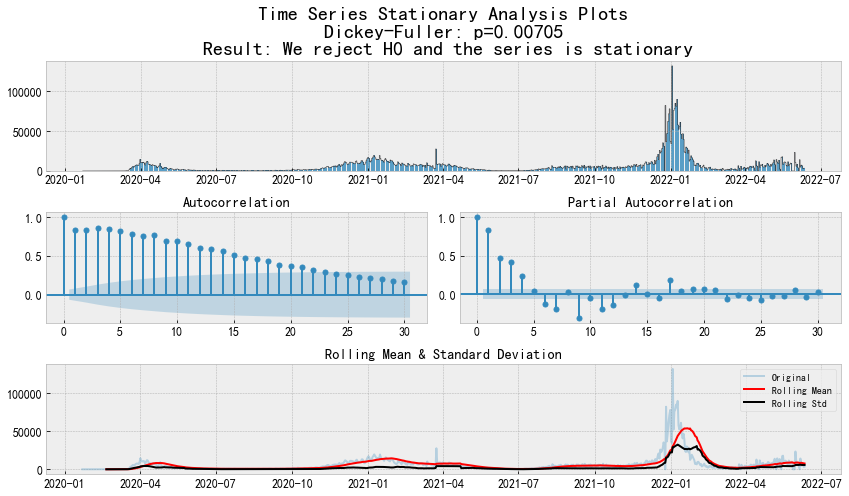

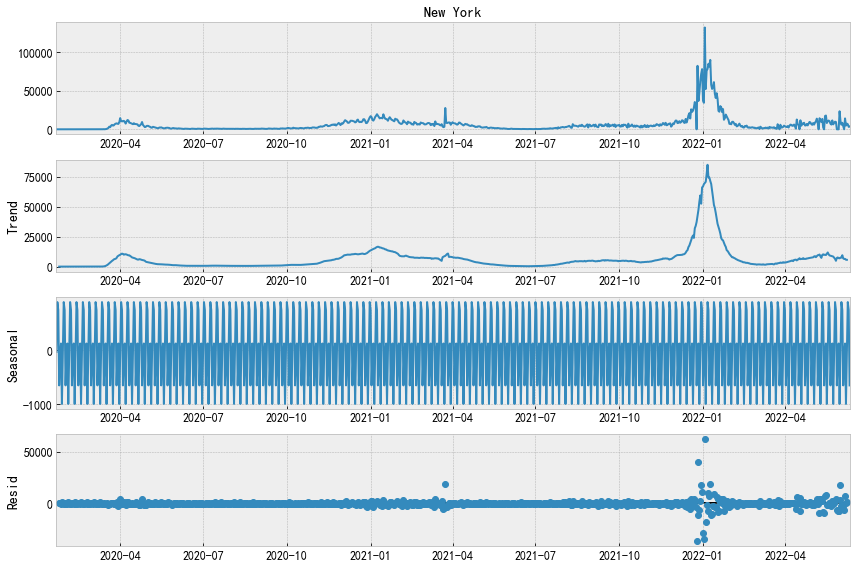

In [30]:
def tsplot(y, lags=None, figsize=(12, 7), ma = 30, decompose = True):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        #y.plot.area(ax=ts_ax)
        ts_ax.step(y.index,y,color = '#202124',linewidth = .5)
        ts_ax.bar(y.index,y,alpha = .8)
        
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject H0 and the series is stationary" if p_value <= 0.05 else "We can not reject H0 and the series is NOT stationary"
        ts_ax.set_title(
            'Time Series Stationary Analysis Plots\n Dickey-Fuller: p={0:.5f} \n Result: {1}'.format(p_value, hypothesis_result),
        fontsize = 20)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = y.rolling(window=ma).mean()
        rolstd = y.rolling(window=ma).std()

        # Plot rolling statistics:
        orig = plt.plot(y, label='Original',alpha = .3)
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        print(f"ADF{Fore.RED}{hypothesis_result}{Style.RESET_ALL}")
        print(f"ADF p value{Fore.BLUE}{round(p_value,6)}{Style.RESET_ALL}")
    if decompose:
        plt.rcParams["figure.figsize"] = (12,8)
        result = seasonal_decompose(y, model='additive')
        result.plot()
        plt.show() 

tsplot(nyc_series, lags=30)

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 思考：

例子使用的是纽约的数据，请尝试使用【上海】的数据，并告诉我，上海的新增确诊时序数据是平稳的么？
</div>